**IMPORTS:**

In [ ]:
import os
import cv2

import numpy as np

!pip install tqdm

from tqdm import tqdm  #for progress bars

import torch

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
from zipfile import ZipFile
zip = ZipFile('')
zip.extractall() 

**Data Processing Class:**

In [ ]:
rebuildData = True # set to true to one once, then back to false unless you want to change something in your training data.

class dogsVScats():
    
    img_size = 50 #normalization
    
    #path for data classes
    
    cats="PetImages/Cat"
    dogs="PetImages/Dog"
    
    #testing = "PetImages/Testing"
    
    #Assigning numerical values for classes
    labels={cats: 0, dogs: 1}
    
    training_data = [] # for images with labels

    catcount = 0
    dogcount = 0

    def training_data_m(self):
        
        #Iterating through directory via labels dict
        for label in self.labels:
            
            print(label)
            
            #Iterating through images in the directory--f: filename
            for f in tqdm(os.listdir(label)):
                
                if "jpg" in f:
                    
                    try:
                        path = os.path.join(label, f) #merge respective paths with label
                        
                        #Converting to greyscale
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        
                        #resize
                        img = cv2.resize(img, (self.img_size, self.img_size))
                        
                        #Appending img data with label
                        #np.eye(2) is used for encoding onehot vectors of class 2
                        
                        self.training_data.append([np.array(img),np.eye(2)[self.labels[label]]])
                        

                        #keeping track of count to check for balance between the classes
                        
                        if label == self.cats:
                            
                            self.catcount += 1
                            
                        elif label == self.dogs:
                            
                            self.dogcount += 1
                            
                            
                    #error handling for images which can't be read
                            
                    except Exception as e:
                        pass
                        
        
        #shuffling td list
        np.random.shuffle(self.training_data)
        
        #save td as .npy file
        np.save("training_data.npy", self.training_data)
        
        print('Cat count:',cdata.catcount)
        print('Dog count:',cdata.dogcount)

if rebuildData:
    
    cdata = dogsVScats()
    cdata.training_data_m()

PetImages/Cat


100%|██████████| 12502/12502 [00:37<00:00, 334.73it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:38<00:00, 323.66it/s]
/opt/conda/lib/python3.8/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Cat count: 12476
Dog count: 12470


In [ ]:
training_data=np.load("training_data.npy", allow_pickle=True)

In [ ]:
print(training_data)

[[array([[207, 207, 207, ..., 178, 175, 172],
         [207, 208, 208, ..., 179, 177, 172],
         [208, 209, 209, ..., 180, 176, 172],
         ...,
         [214, 214, 212, ..., 191, 195, 195],
         [208, 208, 211, ..., 205, 207, 209],
         [216, 220, 217, ..., 238, 240, 232]], dtype=uint8)
  array([1., 0.])]
 [array([[ 54,  54,  56, ...,  54,  55,  53],
         [ 56,  55,  57, ...,  54,  56,  55],
         [ 57,  57,  58, ...,  56,  57,  58],
         ...,
         [221, 216, 184, ..., 148, 196, 167],
         [222, 204, 186, ..., 182, 167, 188],
         [220, 221, 194, ..., 170, 176, 162]], dtype=uint8)
  array([1., 0.])]
 [array([[169, 167, 163, ...,  29,  26,  22],
         [ 37,  29,  29, ...,  38,  29,  18],
         [116,  40,  85, ...,  34,  26,  20],
         ...,
         [198, 207, 212, ..., 207, 205, 218],
         [201, 215, 219, ..., 210, 167, 209],
         [214, 226, 215, ..., 215, 192, 211]], dtype=uint8)
  array([1., 0.])]
 ...
 [array([[ 56,  33,  85, .

In [ ]:
len(training_data)

24946

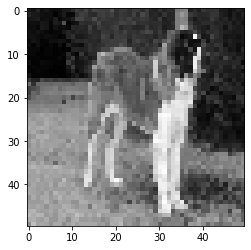

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap="gray")

plt.show()

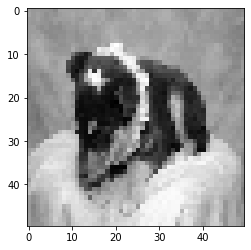

In [ ]:
plt.imshow(X[7],cmap="gray")
plt.show()

In [ ]:
y[7]

tensor([0., 1.])

In [ ]:
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim

**CNN NEURAL NETWORK:**

In [ ]:
class neuralNet(nn.Module):
    #Full arch:
    
    
    def __init__(self):
        
        super().__init__()
        
        #Convolutional Layers:
        
        #5 x 5 img sliding window, starting with 1 img and 32 output channels
        self.cl1=nn.Conv2d(1, 32, 5)
        
        self.cl2=nn.Conv2d(32, 64, 5)
        
        self.cl3=nn.Conv2d(64, 128, 5)
        
        
        
        x=torch.randn(50,50).view(-1,1,50,50) #creating random data assigned to x to pass it through the pooling layer to find out the shape needed for flattening
        
        self._to_linear=None #initializing the variable which holds the shape value for flattening
        
        self.conv(x) # passing x to conv method
        
        # regular fully connected layer-needs flattened tensors
        
        self.fc1=nn.Linear(self._to_linear, 512) # flattening by returning x to self_to_linear, 512 out channels
        
        self.fc2=nn.Linear(512, 2) # 2 output channels as there are two prediction classes
        
   
    # part of the forward method but for passing x when needed and not running the whole forward method and for including max pooling, Activation fn-ReLU
    def conv(self, x):
        
        #relu and max_pooling on cl
        
        x=f.max_pool2d(f.relu(self.cl1(x)), (2,2)) # max pooling is done for 2 x 2
        x=f.max_pool2d(f.relu(self.cl2(x)), (2,2))
        x=f.max_pool2d(f.relu(self.cl3(x)), (2,2))
        
        if self._to_linear is None:
            
            #multiplying the dimensions from each cl together to form the value for flattening
            
            self._to_linear=x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        
        return x
    
    # Mapping to output method:
    
    def forward(self,x):
        
        x=self.conv(x)
        
        x=x.view(-1, self._to_linear) # reshape and flatten
        
        x=f.relu(self.fc1(x))
        #Activation function not required for final output layer
        x=self.fc2(x)
        
        return f.softmax(x, dim=1)

net=neuralNet()

print(net)
        
        

neuralNet(
  (cl1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (cl2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (cl3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


**OPTIMIZER AND LOSS_FN:**

In [ ]:
optimizer= optim.Adam(net.parameters(), lr=0.001)

loss_fn=nn.MSELoss()

**SPLIT DATA FOR TRAIN & VALIDATION:**

**X and y:**

In [ ]:
#Splitting td into X & y and converting it to tensor

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0 # from 0-255 to 0-1

y = torch.Tensor([i[1] for i in training_data])

In [ ]:
validation_pct=0.2

val_size=int(len(X)*validation_pct)
print(val_size)

4989


Train and Test:

In [ ]:
x_train=X[:-val_size] #upto val size
y_train=y[:-val_size]

x_test=X[-val_size:] #from val size
y_test=y[-val_size:]

In [ ]:
print(len(x_train))
print(len(x_test))

19957
4989


**TRAINING:**

With batches

In [ ]:
batch_size=100

epochs=10

for epoch in (epoches):
    
    for i in tqdm(range(0, len(train_X), batch_size)): #start:0, end: length of traindata, step: batch
    
    #split data into batches
    
        X_batch = train_X[i:i+batch_size].view(-1, 1, 50, 50)
        y_batch = train_y[i:i+batch_size]
        
        #Zero the gradients:
        net.zero_grad()
        
        #fitting:
        
        output=net(X_batch)
        
        #loss fn:
        loss=loss_function(output, y_batch)
        
        loss.backward() #Computing the gradient during backward pass
        
        optimizer.step() #update parameters based on current gradient
        

**VALIDATION:**

In [ ]:
correct = 0 #correctly predicted imgs
total = 0   #total number of imgs for validation


with torch.no_grad():
    
    for i in tqdm(range(len(test_X))):
        
         actual= torch.argmax(test_y[i])
        
        net_output = net(test_X[i].view(-1, 1, 50, 50))[0]  #net output as a list
        
        predicted=torch.argmax(net_output)

        if predicted == actual:  #Comapring predicted and actual
            correct += 1
        total += 1
        
print("Accuracy: ", round(correct/total, 3))
